In [ ]:
!pip install pandas scikit-learn nltk

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
import pickle

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# uploading file manually from file
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [ ]:
#reading the csv file and adding in dataframe
df = pd.read_csv('twitter_training.csv')

In [ ]:
#checking head of dataframe
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Adding new heading to the data set
df.columns = ['User_ID', 'Game_Title', 'Sentiment', 'User_Comment']

In [ ]:
df.head(10)

,User_ID,Game_Title,Sentiment,User_Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [ ]:
#considering two column for the further analysis
df = df[['User_Comment', 'Sentiment']]

df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.title()

df = df[df['Sentiment'].isin(['Positive', 'Negative'])]

df = df.reset_index(drop=True)

<ipython-input-10-887ae872ae09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.title()


In [ ]:
df.head(5)

,User_Comment,Sentiment,cleaned_comment
0,I am coming to the borders and I will kill you...,Positive,coming borders kill
1,im getting on borderlands and i will kill you ...,Positive,im getting borderlands kill
2,im coming on borderlands and i will murder you...,Positive,im coming borderlands murder
3,im getting on borderlands 2 and i will murder ...,Positive,im getting borderlands 2 murder
4,im getting into borderlands and i can murder y...,Positive,im getting borderlands murder


In [ ]:
#checking null value from the dataset
df.isnull().sum()

,0
User_Comment,361
Sentiment,0


In [ ]:
#removing null value from the dataset
df = df.dropna()

In [ ]:
# Rechecking null value
df.isnull().sum()

,0
User_Comment,0
Sentiment,0


In [ ]:
#cleaning the dataset

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)    # Remove links
    text = re.sub(r'@\\w+', '', text)                         # Remove @mentions
    text = re.sub(r'#', '', text)                             # Remove # symbol
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)                # Remove special characters
    text = text.lower()                                       # Lowercase everything
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning
df['cleaned_comment'] = df['User_Comment'].astype(str).apply(clean_text)

# Show cleaned data
df.head()

,User_Comment,Sentiment,cleaned_comment
0,I am coming to the borders and I will kill you...,Positive,coming borders kill
1,im getting on borderlands and i will kill you ...,Positive,im getting borderlands kill
2,im coming on borderlands and i will murder you...,Positive,im coming borderlands murder
3,im getting on borderlands 2 and i will murder ...,Positive,im getting borderlands 2 murder
4,im getting into borderlands and i can murder y...,Positive,im getting borderlands murder


In [ ]:
#Spliting the Data for Train/Test
X = df['cleaned_comment']  # Features (inputs)
y = df['Sentiment']        # Labels (outputs)

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Converting Text to Numbers (TF-IDF Vectorizer)
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 words

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
#Training the Model (Logistic Regression)
model = LogisticRegression(max_iter=2000)   # Increased iterations
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

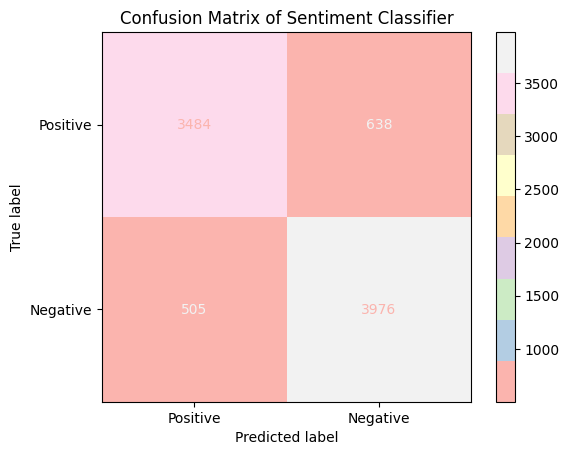

In [ ]:
# Predict on Test Data
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix
labels = ['Positive', 'Negative']  # You can adjust based on your dataset
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Pastel1')
plt.title('Confusion Matrix of Sentiment Classifier')
plt.show()

In [ ]:
##Evaluating the Model
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      4481
    Positive       0.87      0.85      0.86      4122

    accuracy                           0.87      8603
   macro avg       0.87      0.87      0.87      8603
weighted avg       0.87      0.87      0.87      8603

[[3976  505]
 [ 638 3484]]


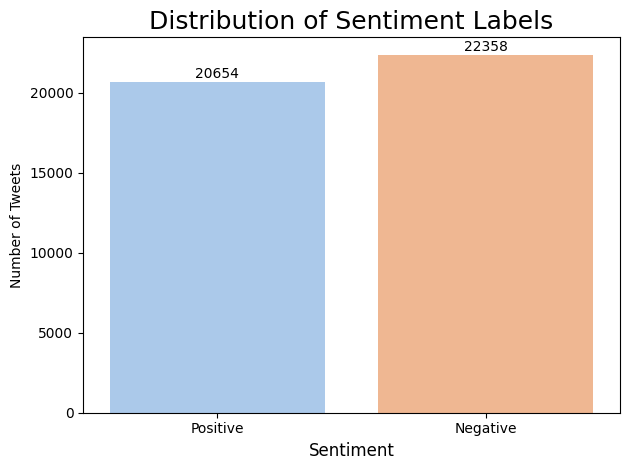

In [ ]:
##Visualizing the analysis
# 1 Create the plot
ax = sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette='pastel', legend=False)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)

# Customize the plot
plt.title('Distribution of Sentiment Labels', fontsize=18)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=10)
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.tight_layout()  # Prevent label cutoff
plt.show()

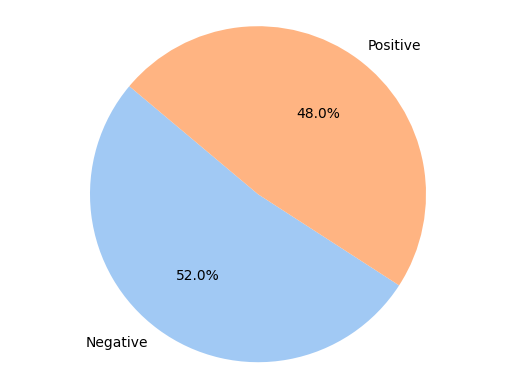

In [ ]:
# 2. Pie Chart
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 86.71%
